<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Current-conclusion" data-toc-modified-id="Current-conclusion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Current conclusion</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#FW_tol-=-0-,-fixed-update" data-toc-modified-id="FW_tol-=-0-,-fixed-update-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>FW_tol = 0 , fixed update</a></span></li><li><span><a href="#0-FW-tol,-no-update" data-toc-modified-id="0-FW-tol,-no-update-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>0 FW tol, no update</a></span></li><li><span><a href="#Evolving-tol-+-fixed-update" data-toc-modified-id="Evolving-tol-+-fixed-update-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evolving tol + fixed update</a></span></li><li><span><a href="#Fixed-update,-no-evolving-tol" data-toc-modified-id="Fixed-update,-no-evolving-tol-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fixed update, no evolving tol</a></span></li><li><span><a href="#No-fixed-update,-evolving-tol" data-toc-modified-id="No-fixed-update,-evolving-tol-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>No fixed update, evolving tol</a></span></li><li><span><a href="#Fixed-update,-no-evolving-tol,-ri-smoothing" data-toc-modified-id="Fixed-update,-no-evolving-tol,-ri-smoothing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fixed update, no evolving tol, ri smoothing</a></span></li><li><span><a href="#Initial-setup" data-toc-modified-id="Initial-setup-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Initial setup</a></span></li></ul></div>

We have huge bumps for 25 nodes which prevents getting to the optimal point. How can we understand what is happening? 

# Current conclusion

- The bumps are due to overshooting in the rebalancers assignment. Because you assign everything (AoN) you at some stage end up with bumps
- It is relatively easy to correct for those bumps and therefore reach the optimum relatively quicker via a fixed update
- However, despite now reaching the cost optimum at each iteration, the balance does not behave as we would want to. 
- Maybe it is because we are going "too far" in solving a problem that is actually not the right one to solve. And therefore, the ri we end up solving for are not the ones we would like to solve for (and therefore we start with an assignment that's even further, etc. 


One solution therefore is to consider 
- smoothing out rebalancers to remain in the middle
- evolving the tolerance of FW we want to solve to (as in the beginning we do not care about a perfect solution)

# Load

In [84]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri, print_final_flows, plot_cost_all_path

import pandas as pd

from result_analysis import plot_stop_and_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
n_nodes=25
subfolder='update_fixed'

In [86]:
path='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+subfolder

In [75]:
print(os.listdir(path))

['output_L_10000_ni_5000_no_20_ev_0_relative_progress.pkl', 'output_L_10000_ni_5000_no_20_ev_0_duality_gap.pkl', 'output_L_10000_ni_5000_no_10_ev_0_relative_progress.pkl', 'output_L_10000_ni_5000_no_25_ev_0_relative_progress.pkl']


In [76]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_20_ev_0_relative_progress.pkl


# FW_tol = 0 , fixed update

Below is the plot for solving with FW_tol=0 with update on the fixed step size. 

We can see we solve "perfectly" for each subproblem. 

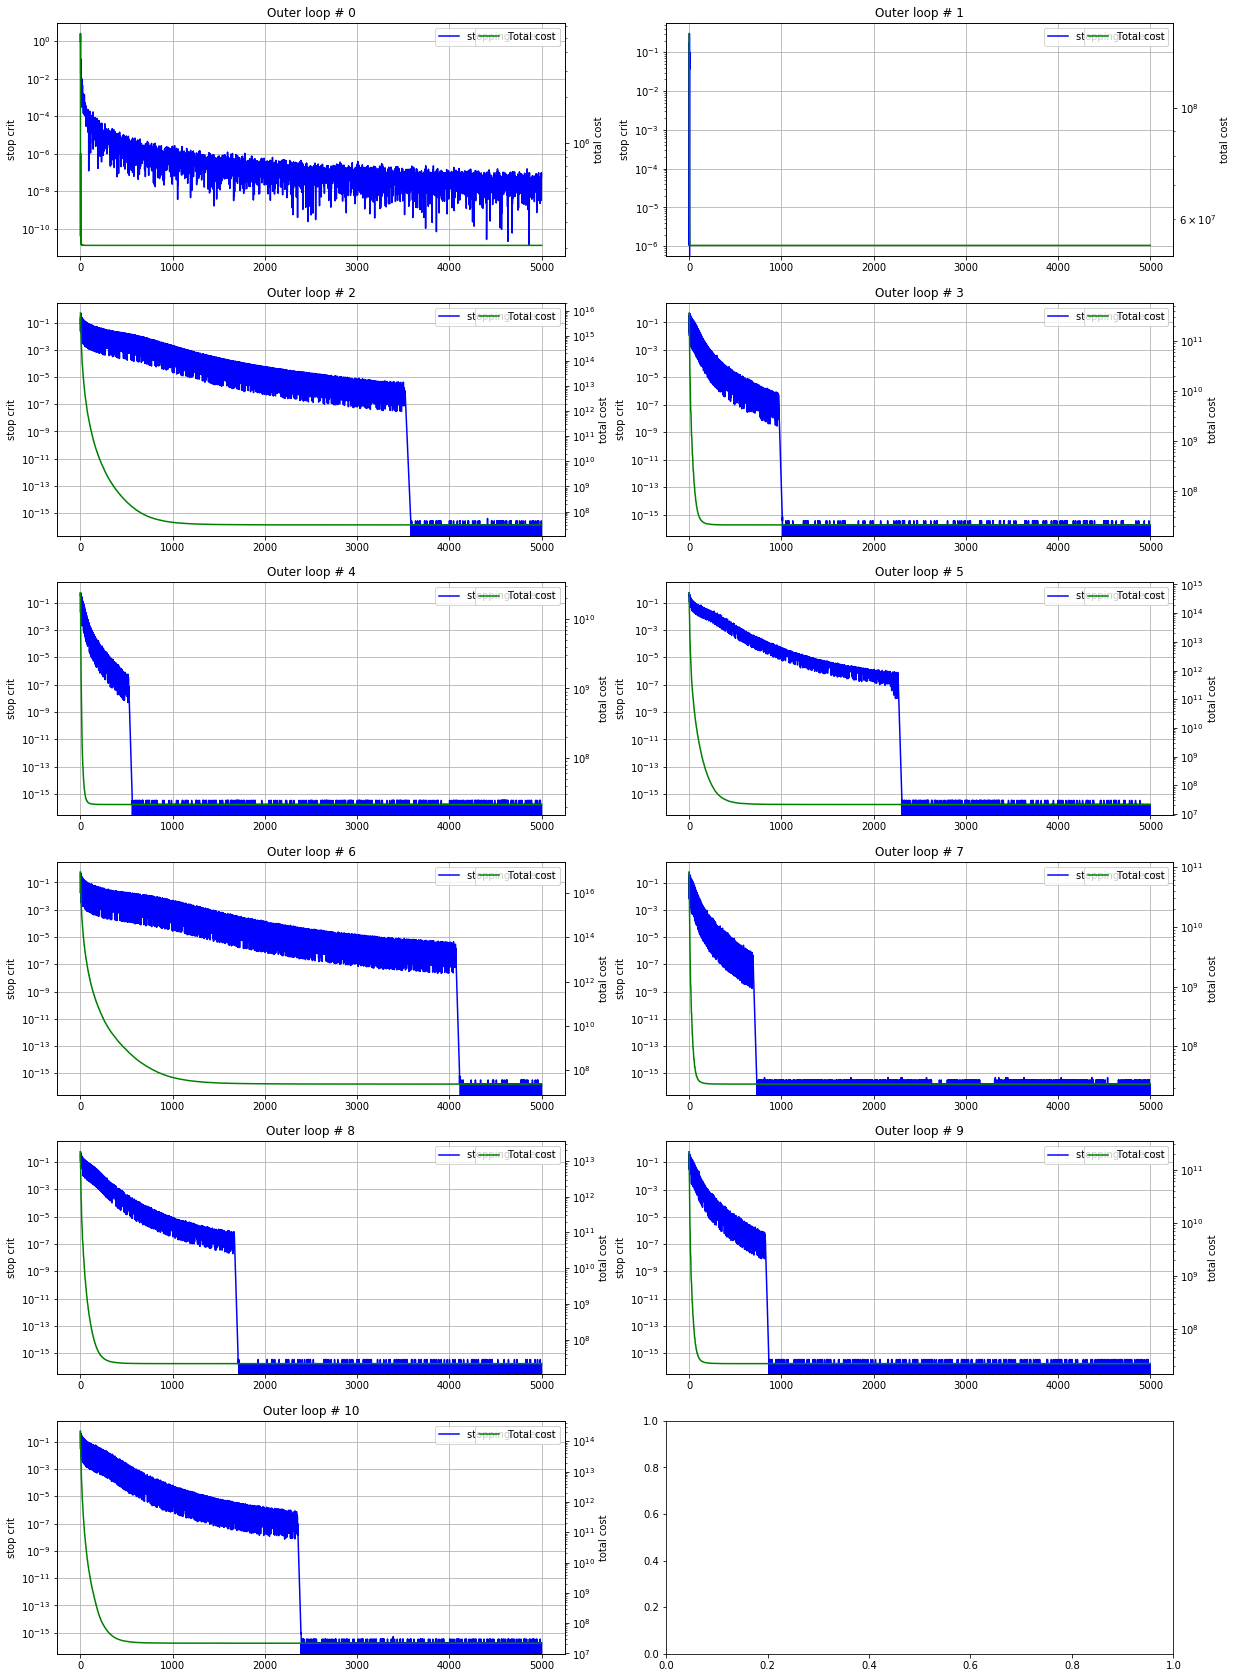

In [77]:
plot_stop_and_cost(opt_res)

However, the ri are oscillating away -- therefore the balance does not reach what we want because we need a stable value of rebalancers for that (the optimal one)

In [79]:
r=dict()
for n in ri_FW[0].keys():
    r[n]=[]
    
for n in r.keys():
    for ri in ri_FW:
        r[n].append(ri[n])

plt.figure(figsize=(13,10))
for n in r.keys():
    plt.plot(r[n],'--', label=n)
plt.grid()
plt.legend()


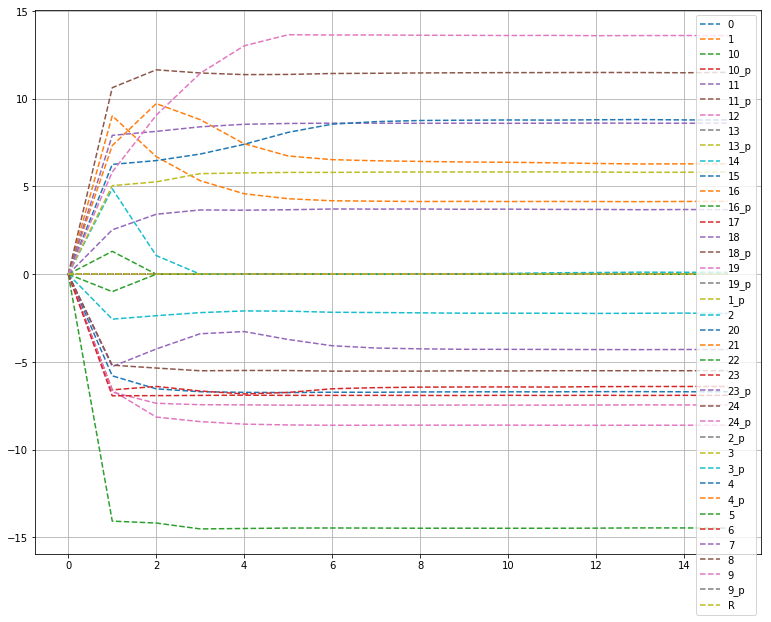

In [90]:
plt.figure(figsize=(13,10))
for n in r.keys():
    plt.plot(r[n],'--', label=n)
plt.grid()
plt.legend()

r=dict()
for n in ri_FW[0].keys():
    r[n]=[]
    
for n in r.keys():
    for ri in ri_FW:
        r[n].append(ri[n])

# 0 FW tol, no update

Below is a plot for 
- solved with duality gap but at 0 tolerance
- no update on the fix step 
Basically we go to full iterations everytime BUT we have the bumps in the costs

In [87]:
filename=os.listdir(path)[1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_20_ev_0_duality_gap.pkl


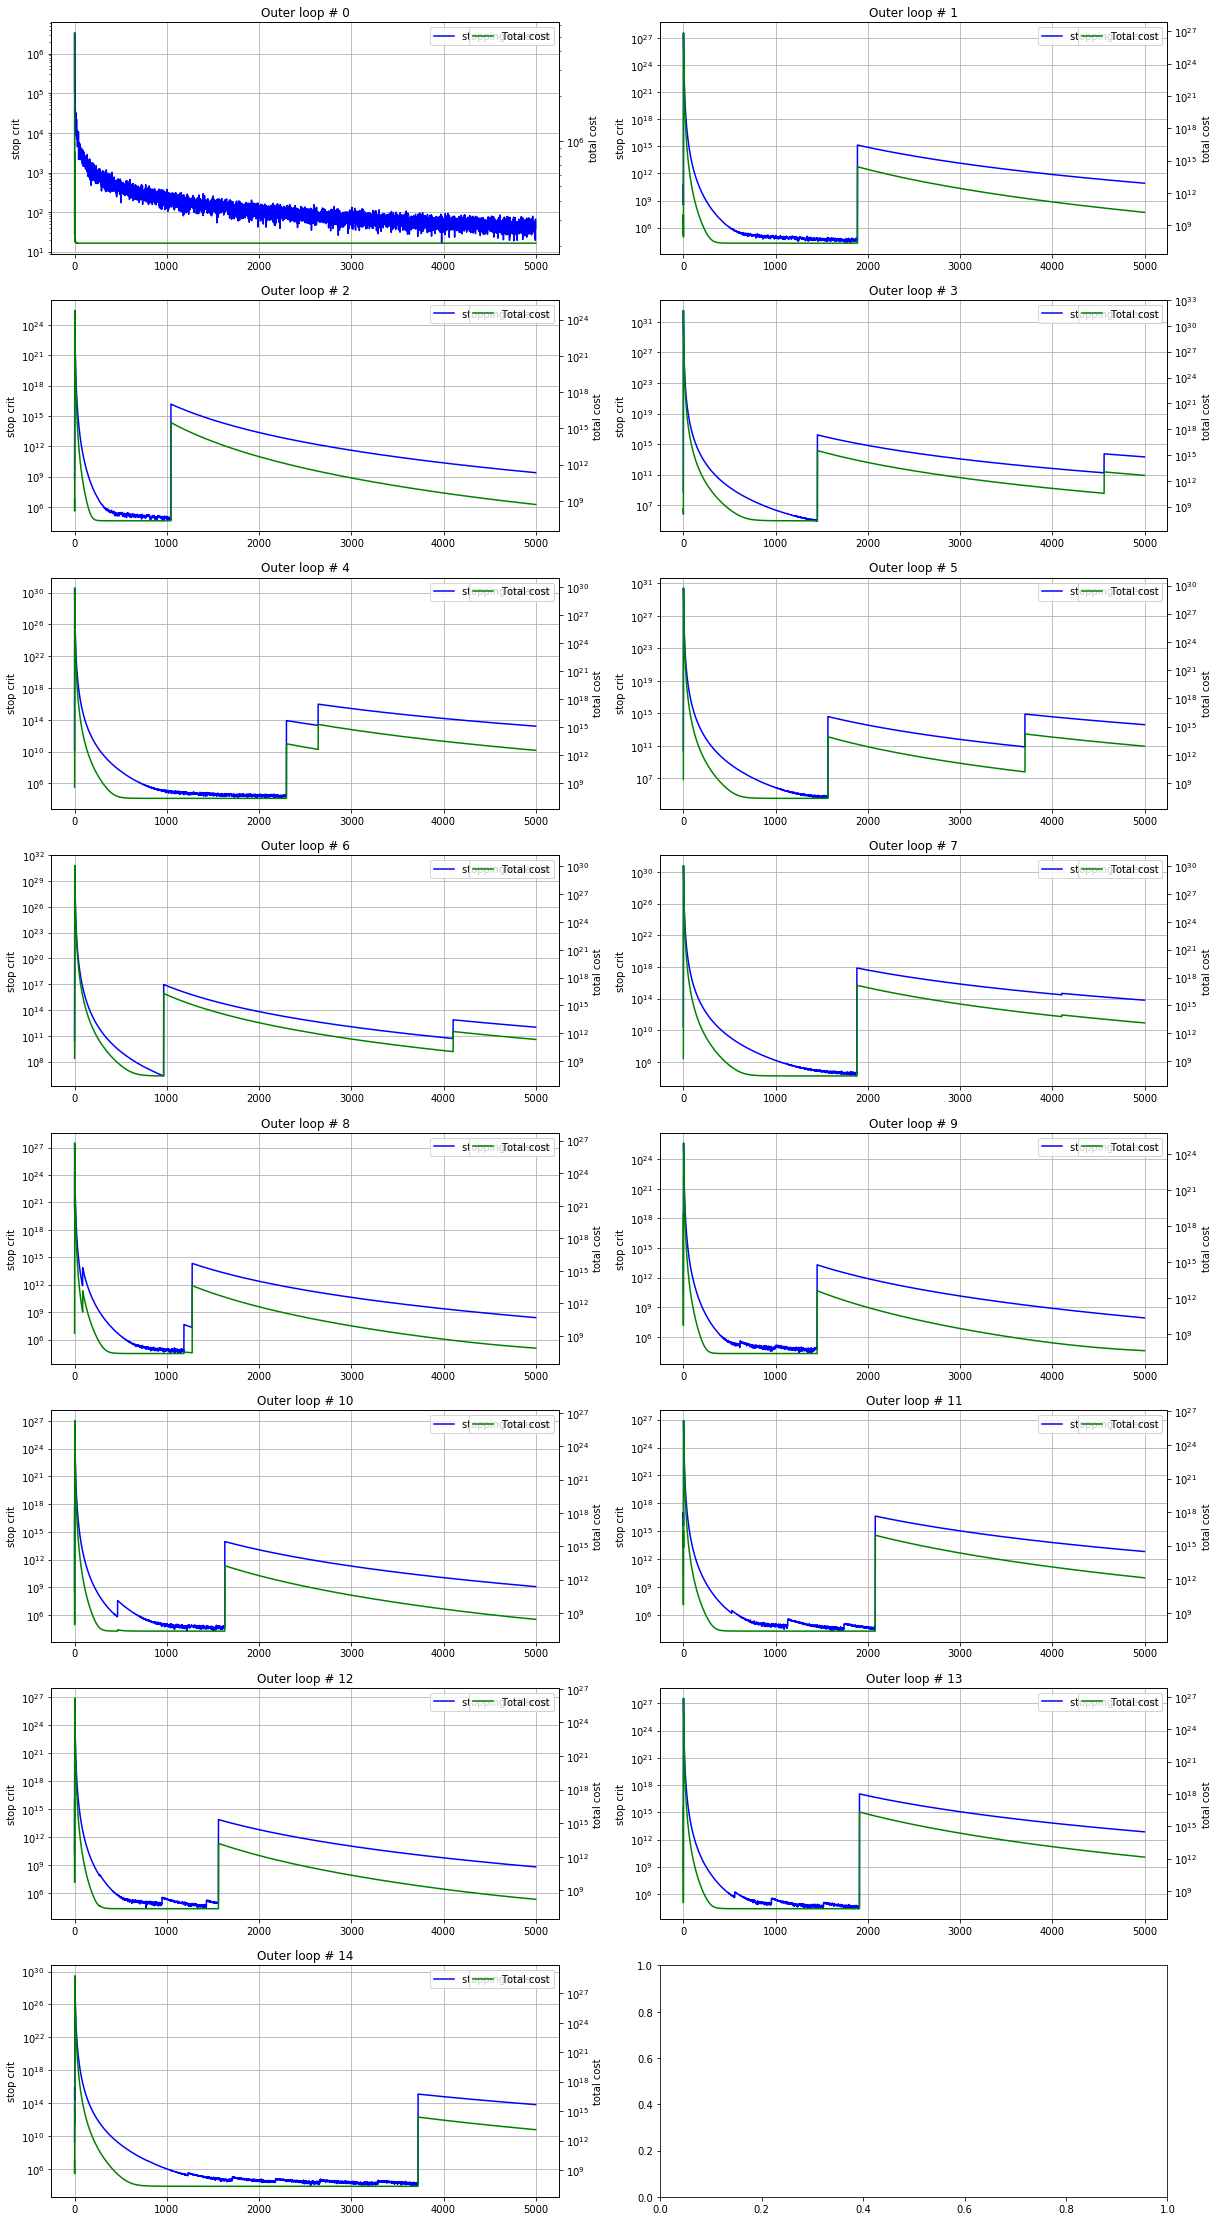

In [88]:
plot_stop_and_cost(opt_res)

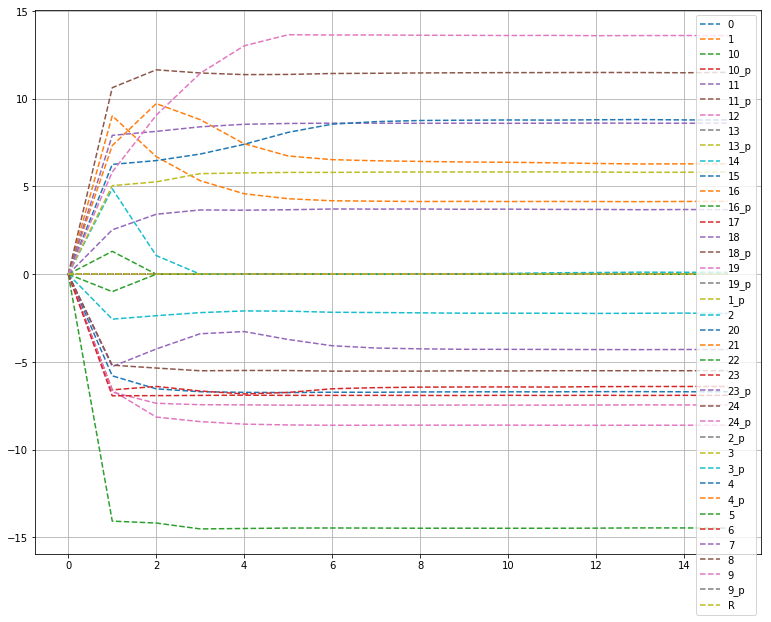

In [90]:
plt.figure(figsize=(13,10))
for n in r.keys():
    plt.plot(r[n],'--', label=n)
plt.grid()
plt.legend()

r=dict()
for n in ri_FW[0].keys():
    r[n]=[]
    
for n in r.keys():
    for ri in ri_FW:
        r[n].append(ri[n])

# Evolving tol + fixed update

Below is a plot with evolving tolerance for FW tol, with fixed update

We still see those ri oscillations and the balance does not improve

In [91]:
path_solved='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+'evolving_FW_tol'

In [92]:
filename=os.listdir(path_solved)[0]
print(filename)

with open(os.path.join(path_solved, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_30_ev_0_relative_progress_fu_True.pkl


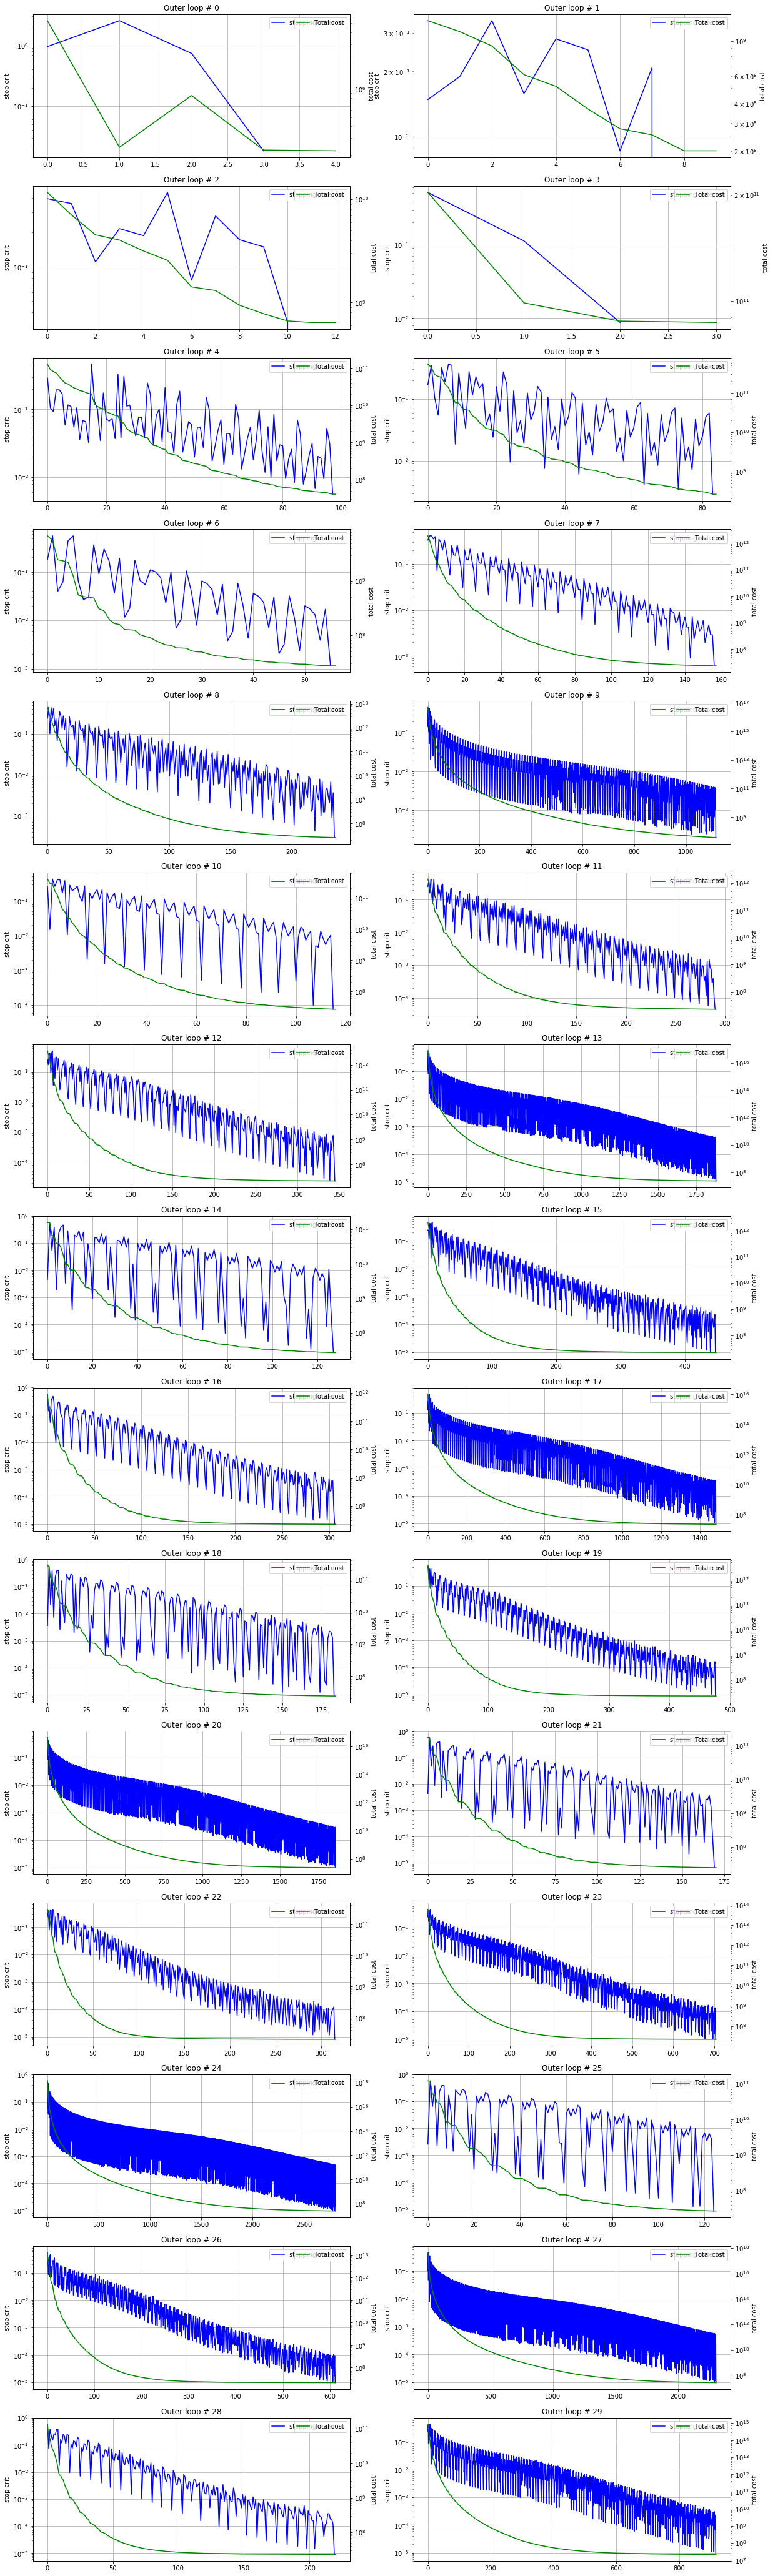

In [93]:
plot_stop_and_cost(opt_res)

(-15, 15)

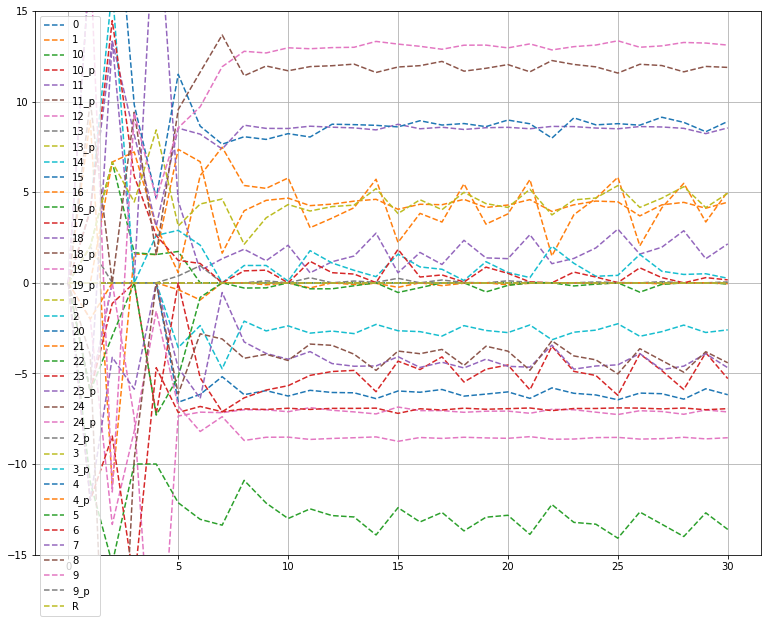

In [97]:
r=dict()
for n in ri_FW[0].keys():
    r[n]=[]
    
for n in r.keys():
    for ri in ri_FW:
        r[n].append(ri[n])
        
plt.figure(figsize=(13,10))
for n in r.keys():
    plt.plot(r[n],'--', label=n)
plt.grid()
plt.legend()
plt.ylim([-15,15])

# Fixed update, no evolving tol

Below
- fixed update, but with a factor of 1.1
- no evolving tol

Does not at all solve the oscillations problem for the ri. We start seeing slightly bigger oscillation in the total cost function.

In [98]:
path_solved='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+'update_factor_fixed_step'

In [99]:
filename=os.listdir(path_solved)[0]
print(filename)

with open(os.path.join(path_solved, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_30_ev_0_relative_progress_fu_True.pkl


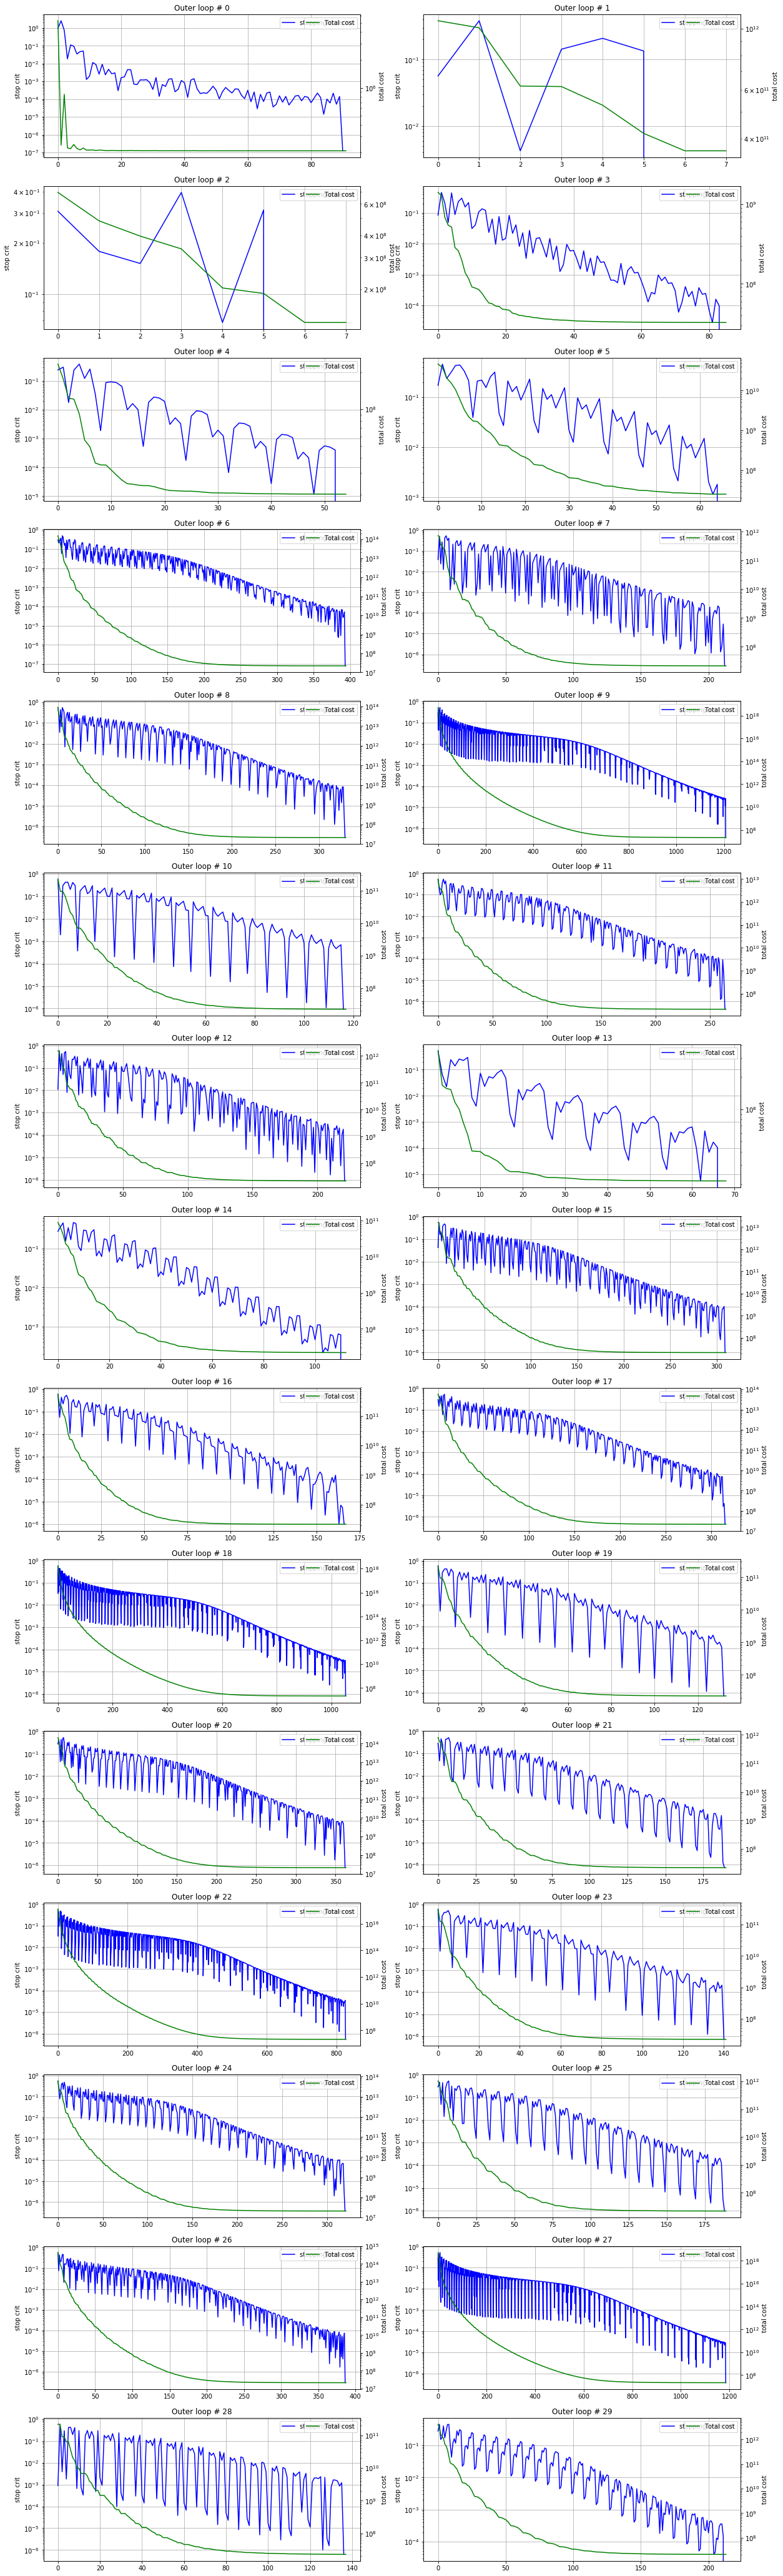

In [100]:
plot_stop_and_cost(opt_res)

(-15, 15)

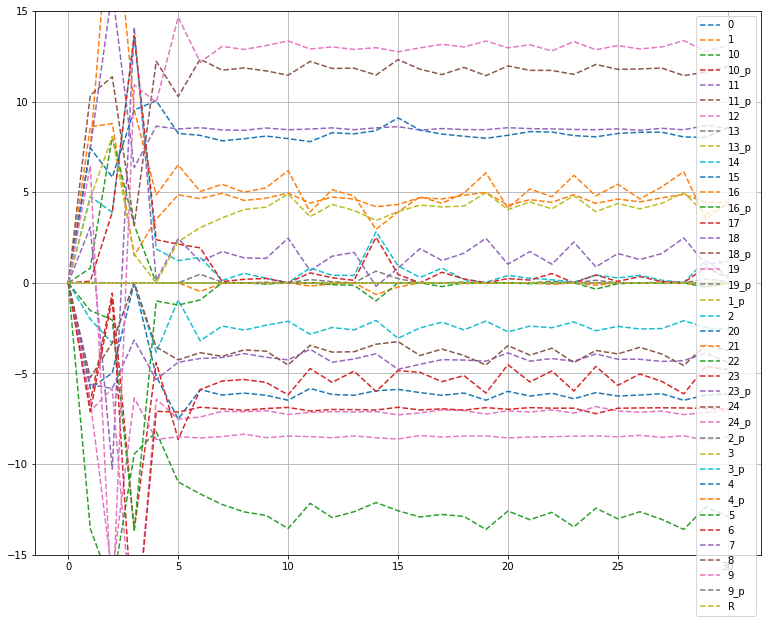

In [102]:
r=dict()
for n in ri_FW[0].keys():
    r[n]=[]
    
for n in r.keys():
    for ri in ri_FW:
        r[n].append(ri[n])
        
plt.figure(figsize=(13,10))
for n in r.keys():
    plt.plot(r[n],'--', label=n)
plt.grid()
plt.legend()
plt.ylim([-15,15])

----------

# No fixed update, evolving tol

Below
- no fixed update
- evolving tol


In [103]:
path_solved='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+'evolving_FW_tol'

In [105]:
filename=os.listdir(path_solved)[2]
print(filename)

with open(os.path.join(path_solved, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_30_ev_0_relative_progress_fu_False.pkl


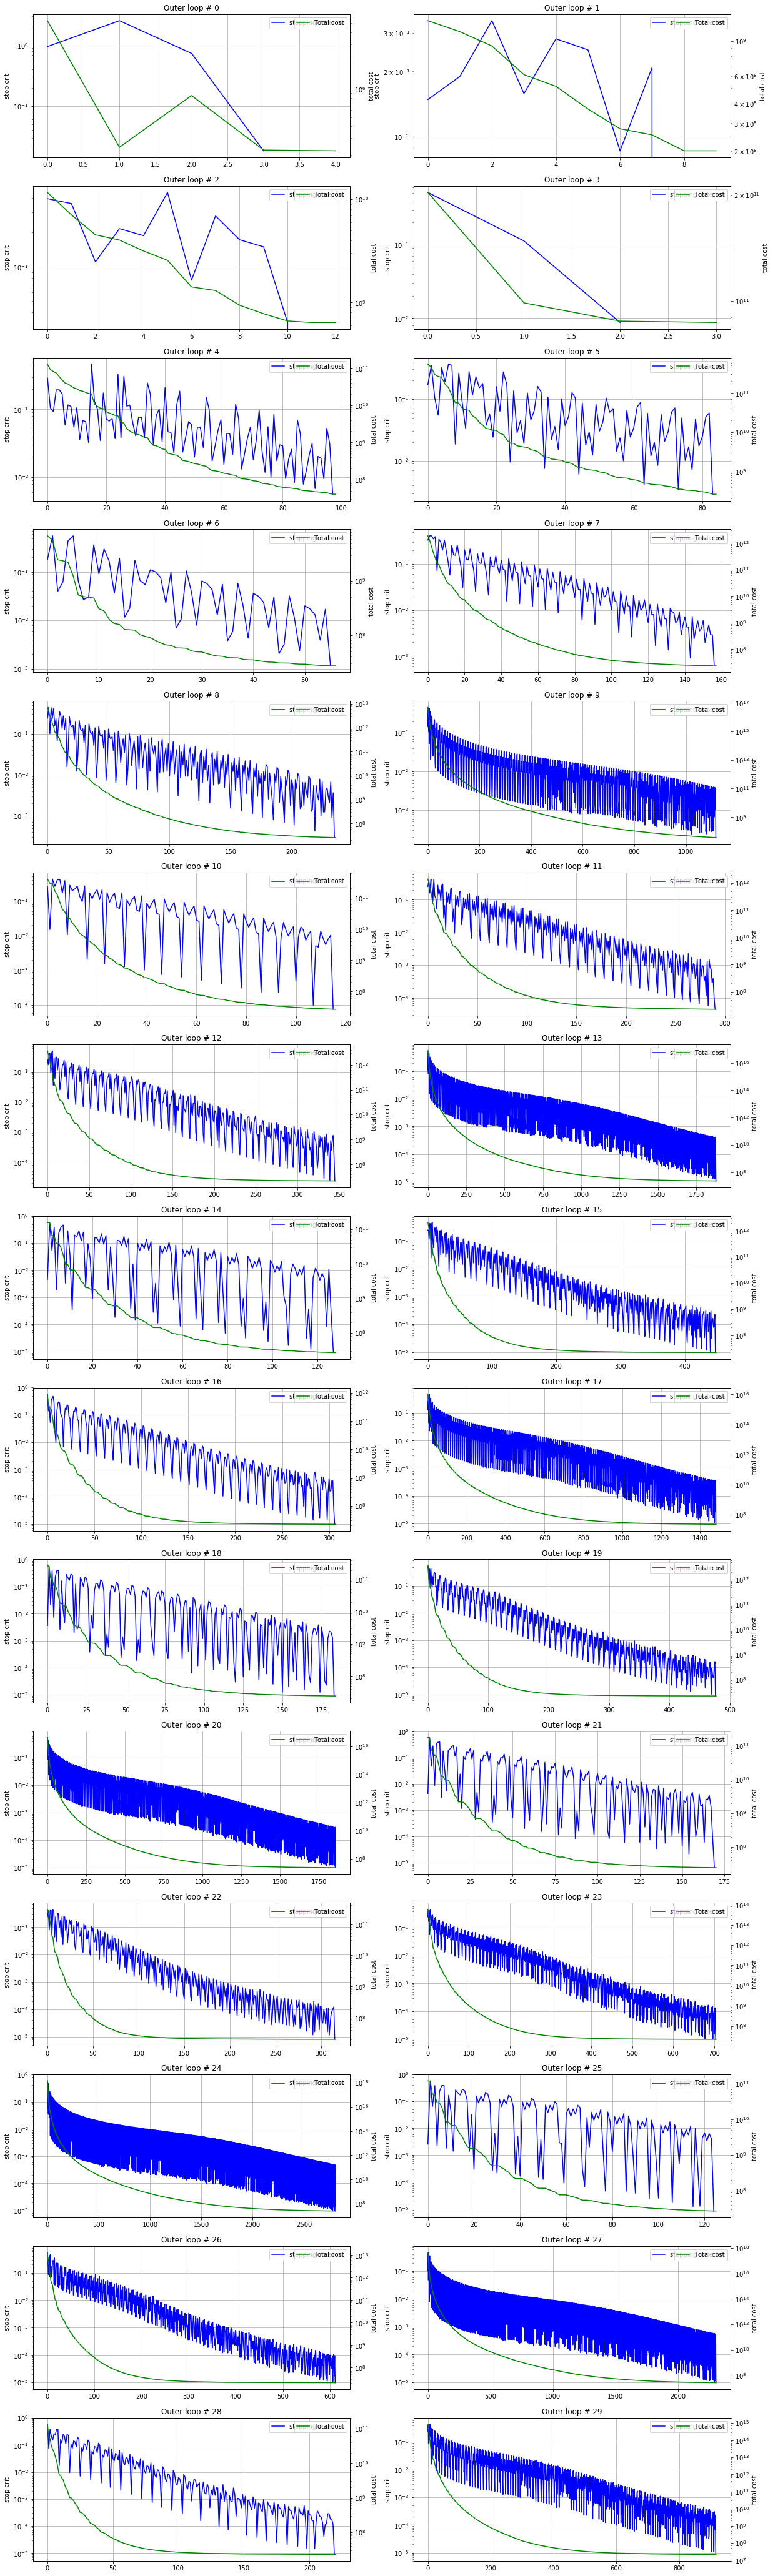

In [93]:
plot_stop_and_cost(opt_res)

(-15, 15)

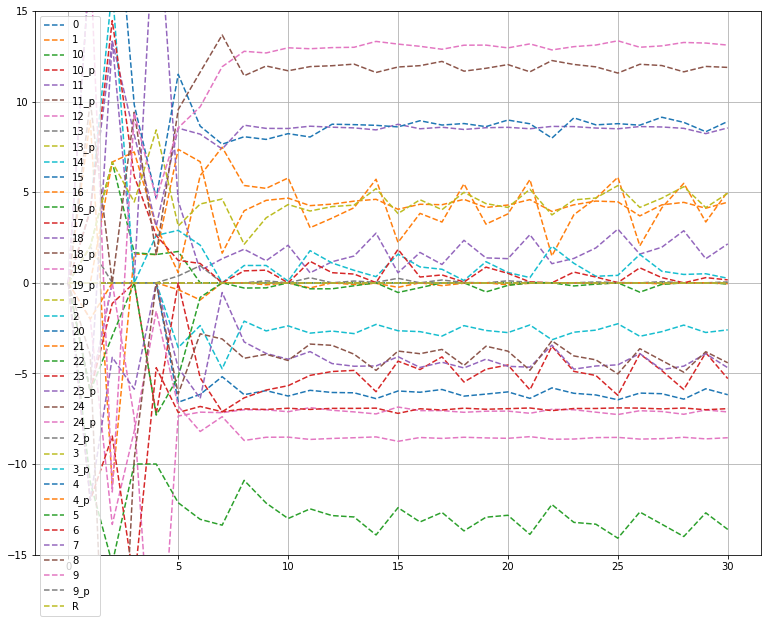

In [97]:
r=dict()
for n in ri_FW[0].keys():
    r[n]=[]
    
for n in r.keys():
    for ri in ri_FW:
        r[n].append(ri[n])
        
plt.figure(figsize=(13,10))
for n in r.keys():
    plt.plot(r[n],'--', label=n)
plt.grid()
plt.legend()
plt.ylim([-15,15])

----------

# Fixed update, no evolving tol, ri smoothing

Below
- fixed update with update factor 1.1
- no evolving tol
- ri smoothing


In [130]:
path_solved='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+'ri_smoothing'

In [131]:
filename=os.listdir(path_solved)[0]
print(filename)

with open(os.path.join(path_solved, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_20_ev_0_relative_progress_fu_True.pkl


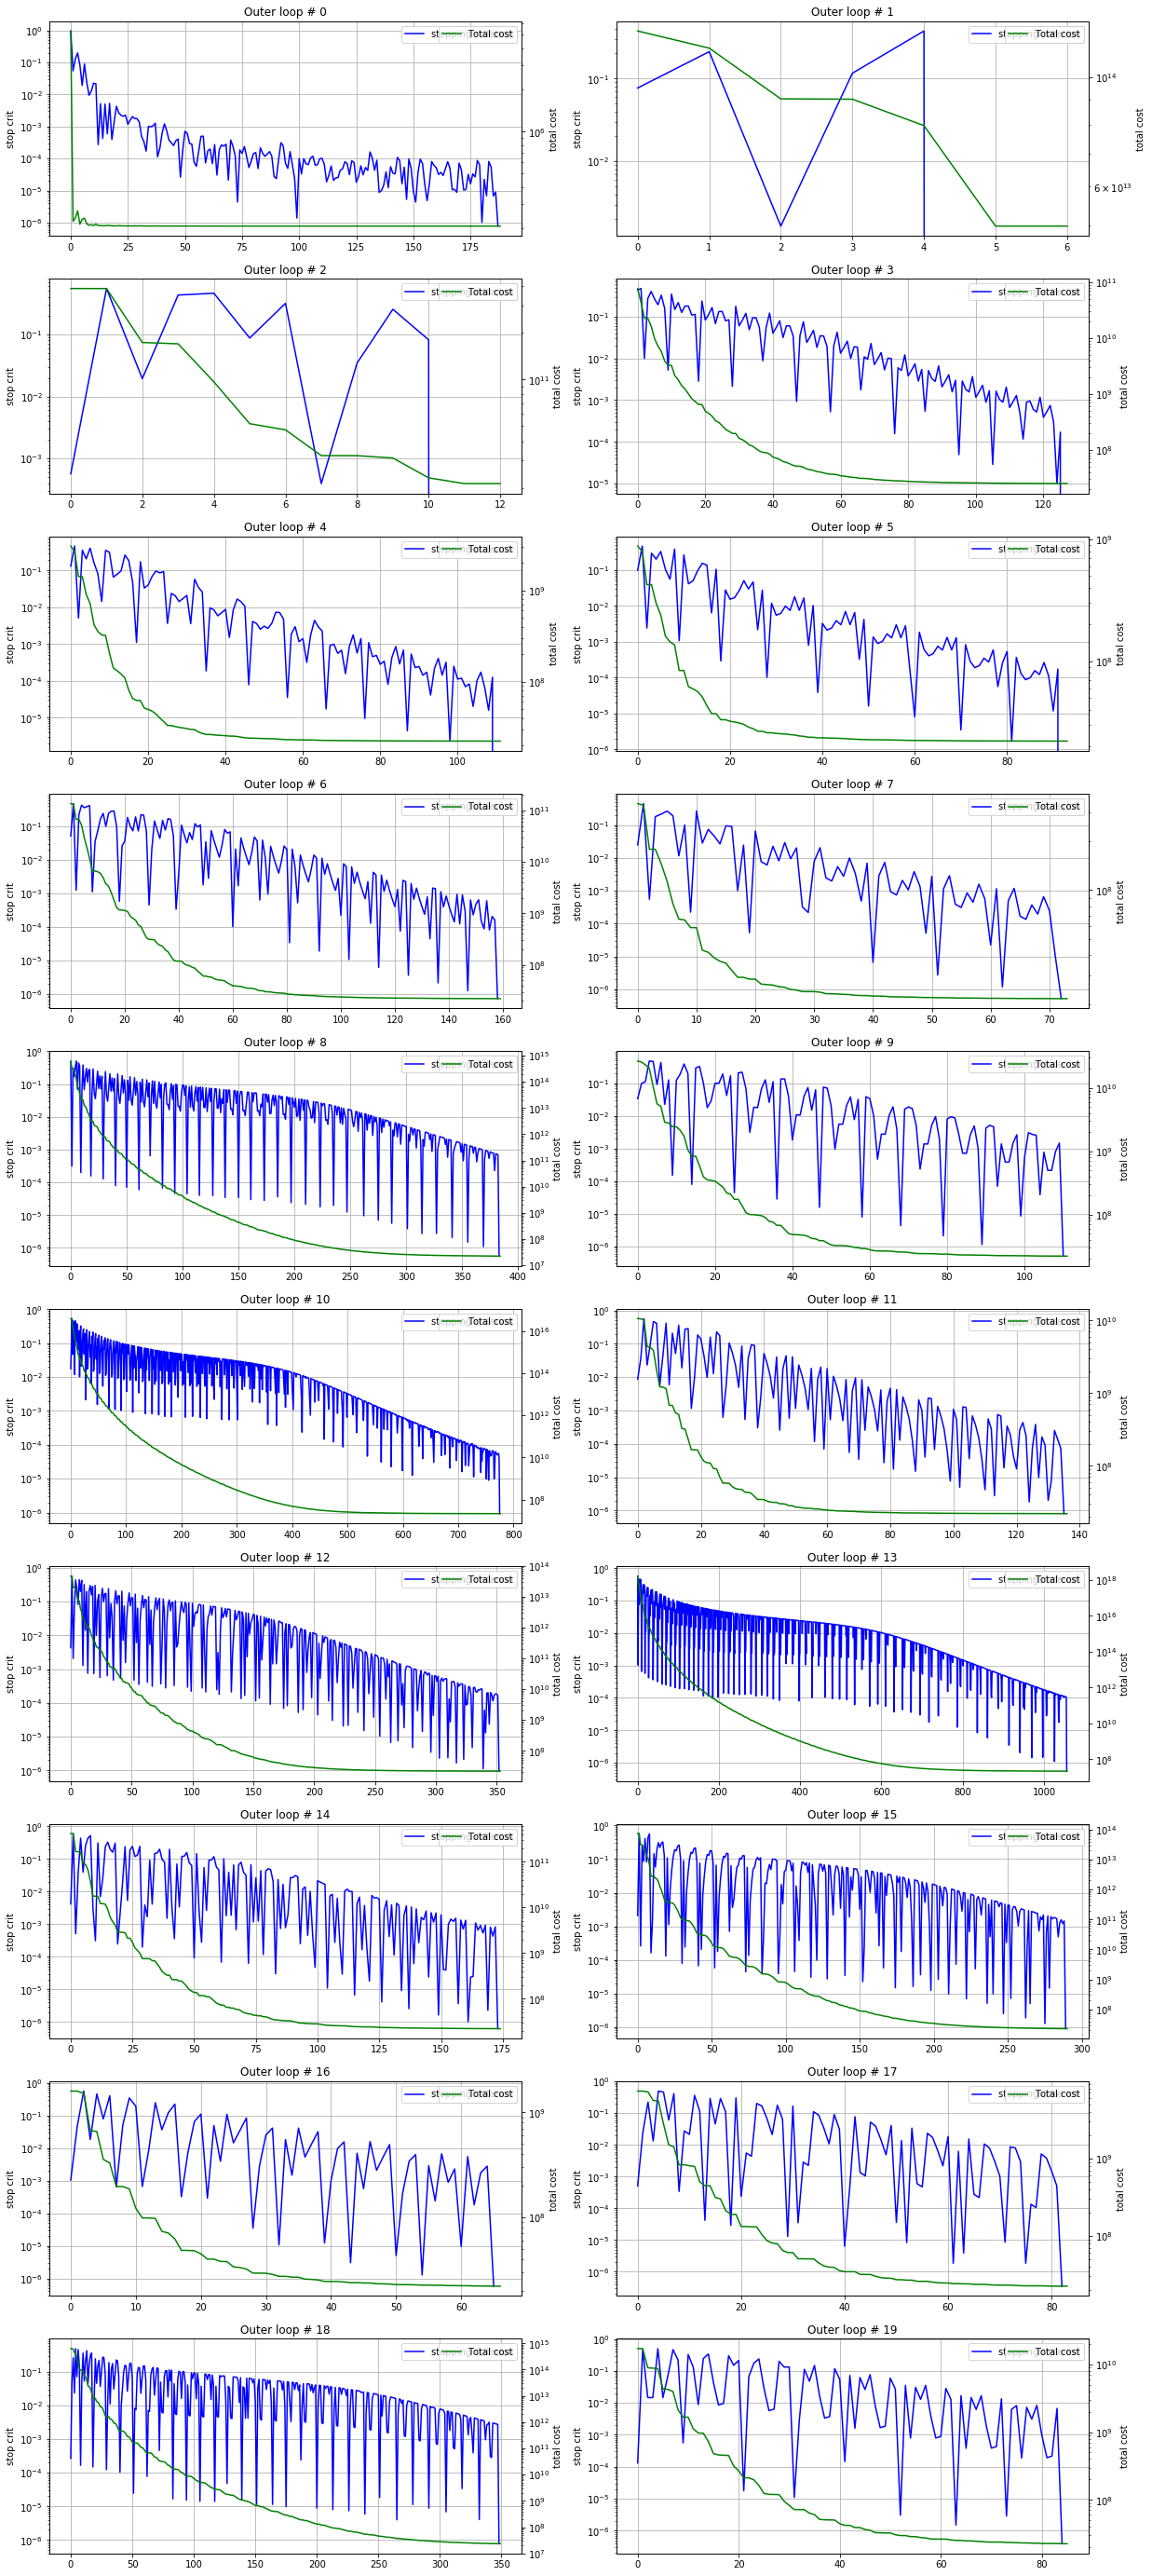

In [132]:
plot_stop_and_cost(opt_res)

(-15, 15)

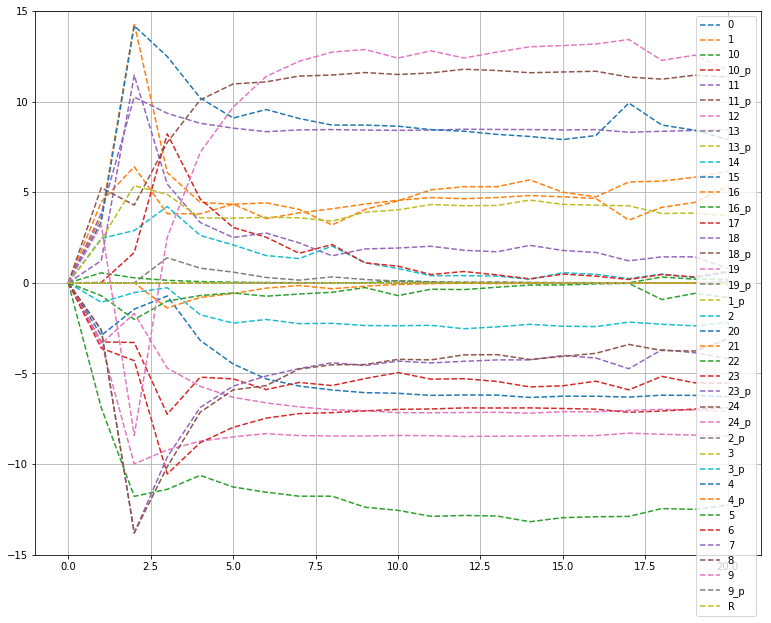

In [133]:
r=dict()
for n in ri_FW[0].keys():
    r[n]=[]
    
for n in r.keys():
    for ri in ri_FW:
        r[n].append(ri[n])
        
plt.figure(figsize=(13,10))
for n in r.keys():
    plt.plot(r[n],'--', label=n)
plt.grid()
plt.legend()
plt.ylim([-15,15])

----------

# Initial setup

Below
- no update for fixed step
- no evolving tol
- no ri smoothing
- FW tol = 0 

Basically I want to see if I also get smooth ri just by cancelling all the "improvements" I implemented


In [135]:
path_solved='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+'test_nothing_ri_smooth'

In [136]:
filename=os.listdir(path_solved)[0]
print(filename)

with open(os.path.join(path_solved, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_20_ev_0_relative_progress_fu_False.pkl


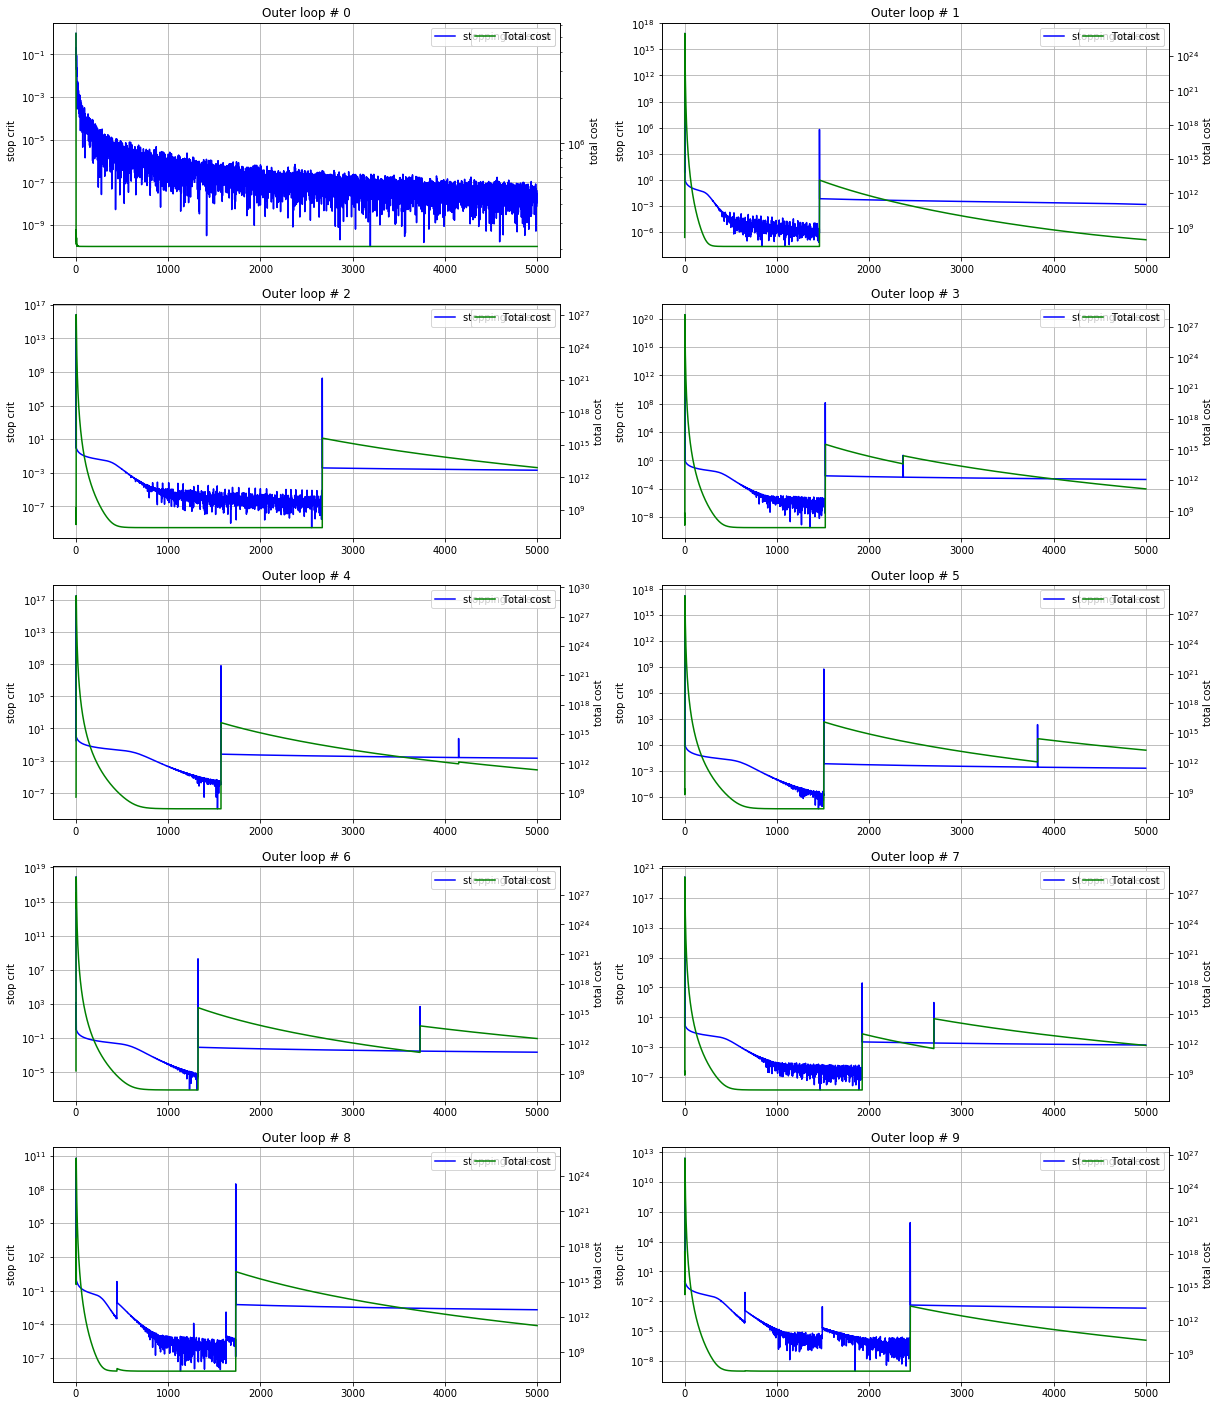

In [137]:
plot_stop_and_cost(opt_res)

(-15, 15)

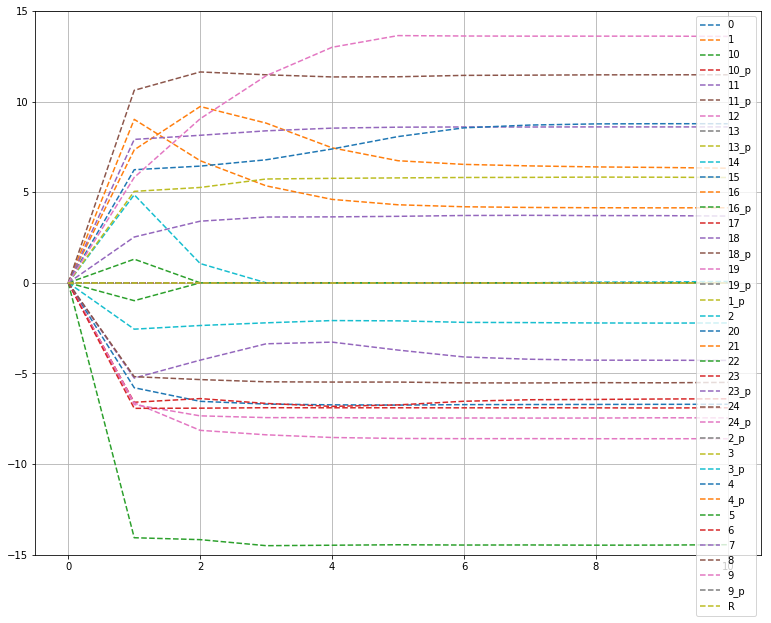

In [138]:
r=dict()
for n in ri_FW[0].keys():
    r[n]=[]
    
for n in r.keys():
    for ri in ri_FW:
        r[n].append(ri[n])
        
plt.figure(figsize=(13,10))
for n in r.keys():
    plt.plot(r[n],'--', label=n)
plt.grid()
plt.legend()
plt.ylim([-15,15])

Indeed we can recover this very smooth behavior. 
But at the cost of high computations...

------

I really do not understand why the rebalancers are smooth in the case of duality gap and not in others

Solutions
- manual rebalancer smoothing
- previous solution
- no smoothing at all or fixed update or evolving tol, just higher tolerance for the inner loop

- Run on larger graphs absolutely in a fast way!